In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats

from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

#input dataset
control = pd.read_csv('control_data.csv')
experiment = pd.read_csv('experiment_data.csv')

In [2]:
# Merge 2 data into 1
control['Test'] = 'control'
experiment['Test'] = 'experiment'

result = control.append(experiment, ignore_index=True)

In [7]:
# Display
result['Date']=pd.to_datetime(result['Date'], format="%a, %b %d")
result['Day']=result['Date'].dt.strftime('%m-%d')
result.shape

(74, 7)

# Does the experiment change the webpage traffic?
We are going to use the two-sample t test to check if the change in Pageviews, Clicks, Enrollments, and Payments are statistically significant.  

In [4]:
t, pval = stats.ttest_ind(result[result.Test == 'control'].Pageviews, result[result.Test == 'experiment'].Pageviews)
print('Pageviews t-statistics={t:5.2f}, p-value={p:5.4f}'.format(t=t, p=pval))
t, pval = stats.ttest_ind(result[result.Test == 'control'].Clicks, result[result.Test == 'experiment'].Clicks)
print('Clicks t-statistics={t:5.2f}, p-value={p:5.4f}'.format(t=t, p=pval))
t, pval = stats.ttest_ind(result[result.Test == 'control'].Enrollments.dropna(), result[result.Test == 'experiment'].Enrollments.dropna())
print('Enrollments t-statistics={t:5.2f}, p-value={p:5.4f}'.format(t=t, p=pval))
t, pval = stats.ttest_ind(result[result.Test == 'control'].Payments.dropna(), result[result.Test == 'experiment'].Payments.dropna())
print('Payments t-statistics={t:5.2f}, p-value={p:5.4f}'.format(t=t, p=pval))

Pageviews t-statistics= 0.14, p-value=0.8877
Clicks t-statistics= 0.09, p-value=0.9264
Enrollments t-statistics= 1.69, p-value=0.0988
Payments t-statistics= 0.59, p-value=0.5564


There is statistically significant difference in the Enrollments between the control and experiment (p<0.1). The changes in Pageviews, Clicks, and Payments are not significant.  It is also noted that the t-statistics is positive, indicating that the Enrollment is reduced when the experiment is implemented.  

# Data Visualization

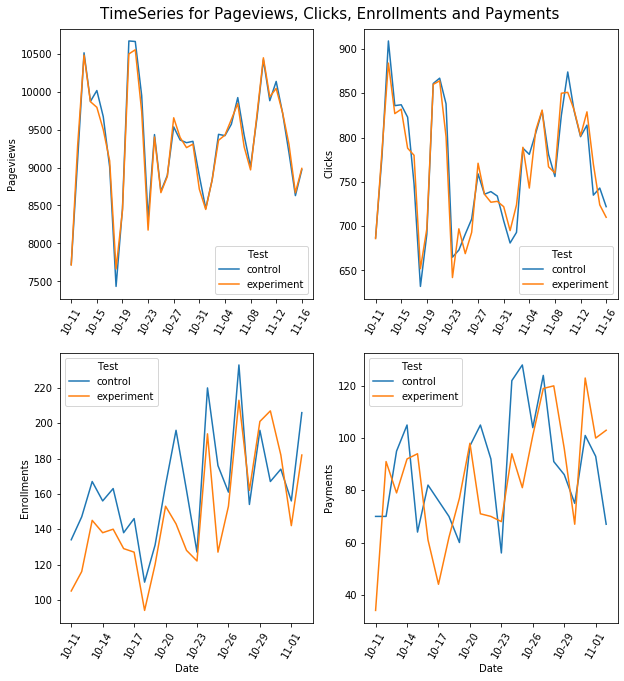

In [5]:
# Time series line chart
fig=plt.figure(figsize = (10, 10))
fig.suptitle('TimeSeries for Pageviews, Clicks, Enrollments and Payments', fontsize =15)

plt.subplot(2, 2, 1)
ax1 = sns.lineplot(x='Day', y='Pageviews', hue='Test', data =result)
plt.xticks(rotation=60)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax1.xaxis.set_label_text("")

plt.subplot(2, 2, 2)
ax2 = sns.lineplot(x='Day', y='Clicks', hue='Test', data =result)
plt.xticks(rotation=60)
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
ax2.xaxis.set_label_text("")

plt.subplot(2, 2, 3)
ax3 = sns.lineplot(x='Day', y='Enrollments', hue='Test', data =result)
plt.xticks(rotation=60)
ax3.xaxis.set_major_locator(plt.MaxNLocator(9))
ax3.xaxis.set_label_text("Date")

plt.subplot(2, 2, 4)
ax4 = sns.lineplot(x='Day', y='Payments', hue='Test', data =result)
plt.xticks(rotation=60)
ax4.xaxis.set_major_locator(plt.MaxNLocator(9))
ax4.xaxis.set_label_text("Date")

fig.subplots_adjust(top=0.95)

plt.show()




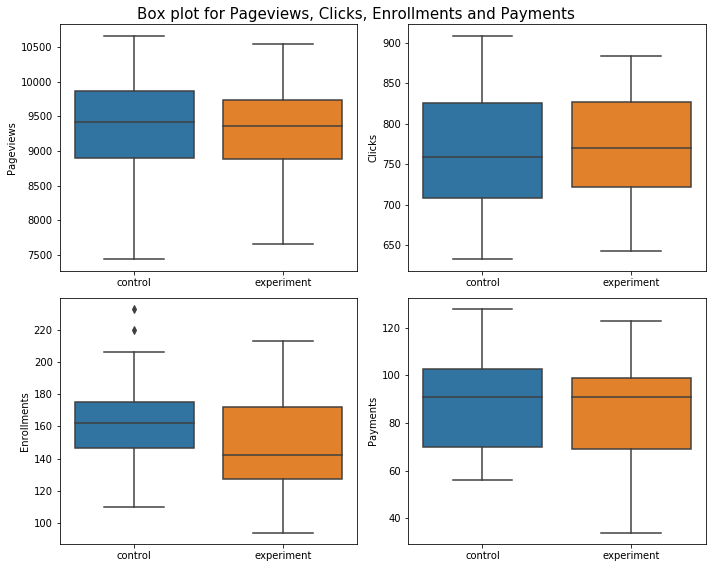

In [6]:
# Boxplot (control vs experiment)
fig=plt.figure(figsize = (10, 8))
fig.suptitle('Box plot for Pageviews, Clicks, Enrollments and Payments', fontsize =15)

plt.subplot(2, 2, 1)
ax1 = sns.boxplot(x='Test', y='Pageviews', data =result)
ax1.xaxis.set_label_text("")

plt.subplot(2, 2, 2)
ax2 = sns.boxplot(x='Test', y='Clicks', data =result)
ax2.xaxis.set_label_text("")

plt.subplot(2, 2, 3)
ax3 = sns.boxplot(x='Test', y='Enrollments', data =result)
ax3.xaxis.set_label_text("")

plt.subplot(2, 2, 4)
ax4 = sns.boxplot(x='Test', y='Payments', data =result)
ax4.xaxis.set_label_text("")

fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()